In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np
import seaborn as sns
import warnings

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
##from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn import tree
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier

## 1. Chương 1 : Đọc dữ liệu và Tiền xử lý 

In [21]:
df = pd.read_csv("D:/HK6/KhaiThacDL/BaoCao/CSV/Google-Playstore.csv")

In [22]:
df.head()

,App Name,App Id,Category,Rating,Rating Count,Installs,Minimum Installs,Maximum Installs,Free,Price,...,Developer Id,Developer Website,Developer Email,Released,Last Updated,Content Rating,Privacy Policy,Ad Supported,In App Purchases,Editors Choice
0,HTTrack Website Copier,com.httrack.android,Communication,3.6,2848.0,"100,000+",100000.0,351560,True,0.0,...,Xavier Roche,http://www.httrack.com/,roche+android@httrack.com,"Aug 12, 2013","May 20, 2017",Everyone,http://android.httrack.com/privacy-policy.html,False,False,False
1,World War 2: Offline Strategy,com.skizze.wwii,Strategy,4.3,17297.0,"1,000,000+",1000000.0,2161778,True,0.0,...,Skizze Games,http://stereo7.com/,Skizze.Games@gmail.com,"Jul 19, 2018","Nov 26, 2020",Everyone 10+,https://www.iubenda.com/privacy-policy/8032781,True,True,False
2,WPSApp,com.themausoft.wpsapp,Tools,4.2,488639.0,"50,000,000+",50000000.0,79304739,True,0.0,...,TheMauSoft,http://www.themausoft.com,wpsapp.app@gmail.com,"Mar 7, 2016","Oct 21, 2020",Everyone,https://sites.google.com/view/wpsapppolicy/main,True,False,False
3,"OfficeSuite - Office, PDF, Word, Excel, PowerP...",com.mobisystems.office,Business,4.2,1224420.0,"100,000,000+",100000000.0,163660067,True,0.0,...,MobiSystems,http://www.mobisystems.com,support-officesuite-android@mobisystems.com,"Dec 22, 2011","Nov 23, 2020",Everyone,http://www.mobisystems.com/mobile/privacy-poli...,True,True,False
4,Loud Player Free,com.arthelion.loudplayer,Music & Audio,4.2,665.0,"50,000+",50000.0,73463,True,0.0,...,Arthelion92,http://www.arthelion.com,arthelion92@gmail.com,"Sep 24, 2016","Nov 22, 2020",Everyone,http://www.arthelion.com/index.php/fr/android-...,False,False,False


In [23]:
#Xóa những cột không cần thiết
df.drop(['App Name', 'App Id','Developer Website','Developer Email','Developer Id','Privacy Policy', 'Released','Last Updated','Currency'],axis=1,inplace=True)

In [24]:
df.head()

,Category,Rating,Rating Count,Installs,Minimum Installs,Maximum Installs,Free,Price,Size,Minimum Android,Content Rating,Ad Supported,In App Purchases,Editors Choice
0,Communication,3.6,2848.0,"100,000+",100000.0,351560,True,0.0,2.7M,2.3 and up,Everyone,False,False,False
1,Strategy,4.3,17297.0,"1,000,000+",1000000.0,2161778,True,0.0,86M,5.1 and up,Everyone 10+,True,True,False
2,Tools,4.2,488639.0,"50,000,000+",50000000.0,79304739,True,0.0,5.8M,4.1 and up,Everyone,True,False,False
3,Business,4.2,1224420.0,"100,000,000+",100000000.0,163660067,True,0.0,59M,4.4 and up,Everyone,True,True,False
4,Music & Audio,4.2,665.0,"50,000+",50000.0,73463,True,0.0,29M,5.0 and up,Everyone,False,False,False


## 1.1. Xử lý dữ liệu bị mất


In [25]:
#Đếm số lượng dữ liệu bị mất của từng cột
for col in df.columns:
    null=df[col].isnull().sum()
    print('{0} have \t{1}   null value'.format(col,null))

Category have 	3   null value
Rating have 	6850   null value
Rating Count have 	6850   null value
Installs have 	161   null value
Minimum Installs have 	161   null value
Maximum Installs have 	0   null value
Free have 	0   null value
Price have 	0   null value
Size have 	0   null value
Minimum Android have 	2013   null value
Content Rating have 	0   null value
Ad Supported have 	0   null value
In App Purchases have 	0   null value
Editors Choice have 	0   null value


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1118136 entries, 0 to 1118135
Data columns (total 14 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   Category          1118133 non-null  object 
 1   Rating            1111286 non-null  float64
 2   Rating Count      1111286 non-null  float64
 3   Installs          1117975 non-null  object 
 4   Minimum Installs  1117975 non-null  float64
 5   Maximum Installs  1118136 non-null  int64  
 6   Free              1118136 non-null  bool   
 7   Price             1118136 non-null  float64
 8   Size              1118136 non-null  object 
 9   Minimum Android   1116123 non-null  object 
 10  Content Rating    1118136 non-null  object 
 11  Ad Supported      1118136 non-null  bool   
 12  In App Purchases  1118136 non-null  bool   
 13  Editors Choice    1118136 non-null  bool   
dtypes: bool(4), float64(4), int64(1), object(5)
memory usage: 89.6+ MB


In [27]:
#Xóa những dòng dữ liệu bị mất vì số lượng dữ liệu bị mất không đáng kể
##df.fillna(method='bfill',inplace=True)
df = df.dropna()

In [28]:
#Đếm lại
for col in df.columns:
    null=df[col].isnull().sum()
    print('{0} have {1}   null value'.format(col,null))

Category have 0   null value
Rating have 0   null value
Rating Count have 0   null value
Installs have 0   null value
Minimum Installs have 0   null value
Maximum Installs have 0   null value
Free have 0   null value
Price have 0   null value
Size have 0   null value
Minimum Android have 0   null value
Content Rating have 0   null value
Ad Supported have 0   null value
In App Purchases have 0   null value
Editors Choice have 0   null value


## 1.2. Chuyển đổi kiểu dữ liệu cột Installs thành kiểu int

In [29]:
#Các lệnh sẽ loại dấu ',' và '+' trong giá trị của installs
def string_to_numeric(data):
    data=data.replace(',','')
    data=data[:-1]
    return int(data)

df['Installs'] = df['Installs'].apply(string_to_numeric)

C:\Users\hoang\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[]

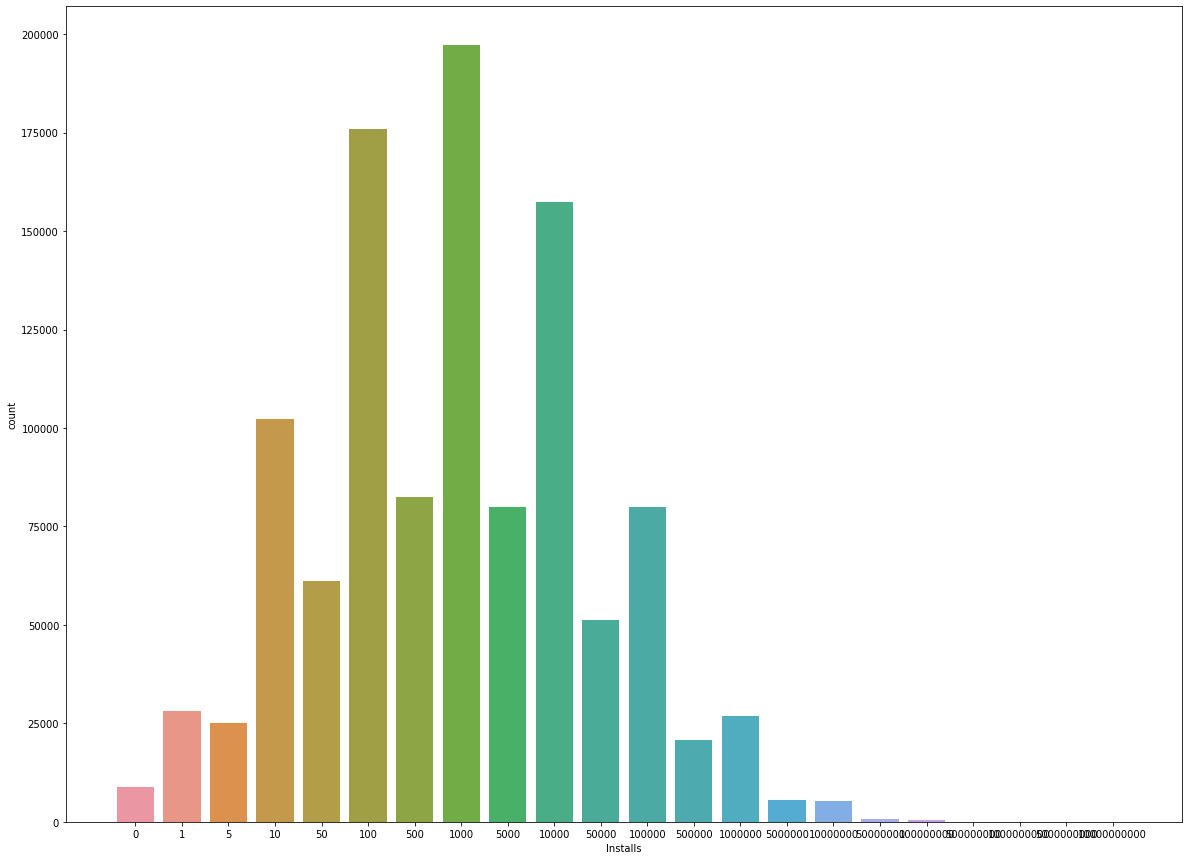

In [31]:
plt.figure(figsize=(20,15))
sns.countplot(df['Installs'])
plt.plot()

## 1.3.  Chuyển đổi kiểu dữ liệu cột Size thành kiểu int

In [33]:
#Đổi các kích thước về Kilobyte
def define_size(data):
    data=data.replace(',','')
    num=data[:-1]
    if data[-1]=='K' or data[-1]=='k' :
        return float(num)
    elif data[-1]=='M' or data[-1]=='m':
        return float(num)*1000
    elif data[-1]=='G' or data[-1]=='g':
        return float(num)*1000000
    else:
        return 1000
df['Size']=df['Size'].apply(define_size)

## 1.4.  Chuyển đổi kiểu dữ liệu cột Content Rating thành dạng số để phù hợp với đầu vào

In [35]:
#Xem các giá trị trong cột Content Rating
df['Content Rating'].value_counts()

Everyone           960746
Teen                98920
Mature 17+          31735
Everyone 10+        17753
Unrated                66
Adults only 18+        52
Name: Content Rating, dtype: int64

In [37]:
#Gán nhãn cho từng giá trị trong cột 
lbl_content_rating=LabelEncoder()
df['Content Rating']=lbl_content_rating.fit_transform(df['Content Rating'])

In [38]:
df['Content Rating'].value_counts()

1    960746
4     98920
3     31735
2     17753
5        66
0        52
Name: Content Rating, dtype: int64

## 1.5.  Chuyển đổi kiểu dữ liệu cột Minimum Android Version thành dạng số để phù hợp với đầu vào

In [39]:
def min_android(data):
    p=data.split()
    if data=='Varies with device':
        return 4.0
    else:
        return float(p[0][:3])
df['Minimum Android']=df['Minimum Android'].apply(min_android)

C:\Users\hoang\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[]

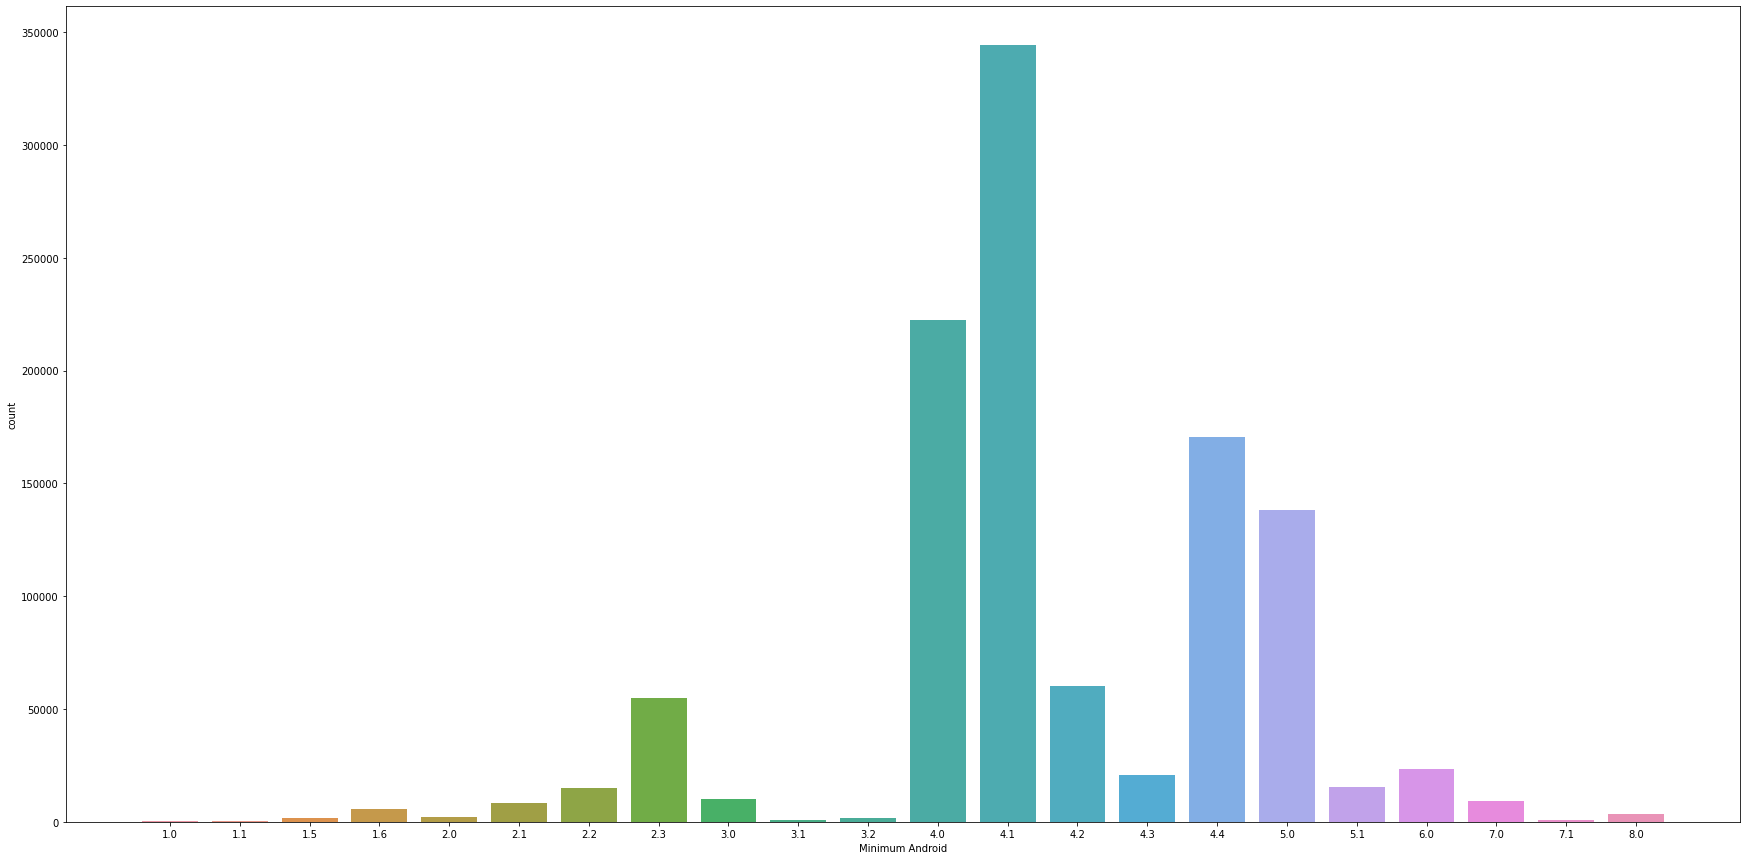

In [41]:
plt.figure(figsize=(30,15))
sns.countplot(df['Minimum Android'])
plt.plot()

## 1.6.  Chuyển đổi kiểu dữ liệu cột Category thành dạng số để phù hợp với đầu vào

In [43]:
#Xem các giá trị của Category
df['Category'].value_counts()

Education                  114728
Music & Audio              104205
Entertainment               81798
Books & Reference           78771
Personalization             73234
Tools                       68090
Lifestyle                   54383
Business                    41729
Health & Fitness            31193
Productivity                29999
Photography                 28857
Travel & Local              25735
Finance                     24648
Puzzle                      24595
Food & Drink                24069
Sports                      21919
News & Magazines            21497
Shopping                    20299
Casual                      19938
Communication               18203
Arcade                      17320
Social                      16862
Simulation                  15046
Medical                     12428
Action                      12308
Art & Design                12255
Educational                 11266
Maps & Navigation           10343
Adventure                   10002
Video Players 

In [45]:
#Gán nhãn cho từng giá trị trong cột
lbl_category=LabelEncoder()
df['Category']=lbl_category.fit_transform(df['Category'])

In [46]:
#Xem các giá trị của Category sau khi gán nhãn
df['Category'].value_counts()

15    114728
28    104205
17     81798
7      78771
31     73234
42     68090
24     54383
8      41729
21     31193
33     29999
32     28857
43     25735
19     24648
34     24595
20     24069
40     21919
29     21497
37     20299
11     19938
13     18203
2      17320
39     16862
38     15046
26     12428
0      12308
3      12255
16     11266
25     10343
1      10002
45      9023
4       6758
5       6205
35      5922
36      5464
44      5442
22      5432
6       5204
47      4648
9       4628
41      3953
18      3746
46      2930
14      2862
10      2632
27      2487
23      2352
12      2103
30      1761
Name: Category, dtype: int64

## 1.7.  Chuyển đổi kiểu dữ liệu cột Free thành dạng bool

In [48]:
df.Free.value_counts()

True     1062995
False      46277
Name: Free, dtype: int64

In [49]:
df.Free=pd.Categorical(df.Free,ordered=True,categories=[False,True]).codes

In [50]:
df.Free.value_counts()

1    1062995
0      46277
Name: Free, dtype: int64

## 1.8.  Chuyển đổi kiểu dữ liệu cột Ad Supported thành dạng bool

In [51]:
df['Ad Supported'].value_counts()

True     722081
False    387191
Name: Ad Supported, dtype: int64

In [52]:
df['Ad Supported']=pd.Categorical(df['Ad Supported'],ordered=True,categories=[False,True]).codes

In [53]:
df['Ad Supported'].value_counts()

1    722081
0    387191
Name: Ad Supported, dtype: int64

## 1.9.  Chuyển đổi kiểu dữ liệu cột In App Purchases thành dạng bool

In [54]:
df['In App Purchases'].value_counts()

False    990503
True     118769
Name: In App Purchases, dtype: int64

In [55]:
df['In App Purchases']=pd.Categorical(df['In App Purchases'],ordered=True,categories=[False,True]).codes

In [56]:
df['In App Purchases'].value_counts()

0    990503
1    118769
Name: In App Purchases, dtype: int64

## 1.10.  Chuyển đổi kiểu dữ liệu cột In Editors Choice thành dạng bool

In [57]:
df['Editors Choice'].value_counts()

False    1108525
True         747
Name: Editors Choice, dtype: int64

In [58]:
df['Editors Choice']=pd.Categorical(df['Editors Choice'],ordered=True,categories=[False,True]).codes

In [59]:
df['Editors Choice'].value_counts()

0    1108525
1        747
Name: Editors Choice, dtype: int64

## *Như vậy, ta đã có dữ liệu sạch để dùng để dự đoán.

In [60]:
df.head()

,Category,Rating,Rating Count,Installs,Minimum Installs,Maximum Installs,Free,Price,Size,Minimum Android,Content Rating,Ad Supported,In App Purchases,Editors Choice
0,13,3.6,2848.0,100000,100000.0,351560,1,0.0,2700.0,2.3,1,0,0,0
1,41,4.3,17297.0,1000000,1000000.0,2161778,1,0.0,86000.0,5.1,2,1,1,0
2,42,4.2,488639.0,50000000,50000000.0,79304739,1,0.0,5800.0,4.1,1,1,0,0
3,8,4.2,1224420.0,100000000,100000000.0,163660067,1,0.0,59000.0,4.4,1,1,1,0
4,28,4.2,665.0,50000,50000.0,73463,1,0.0,29000.0,5.0,1,0,0,0


[]

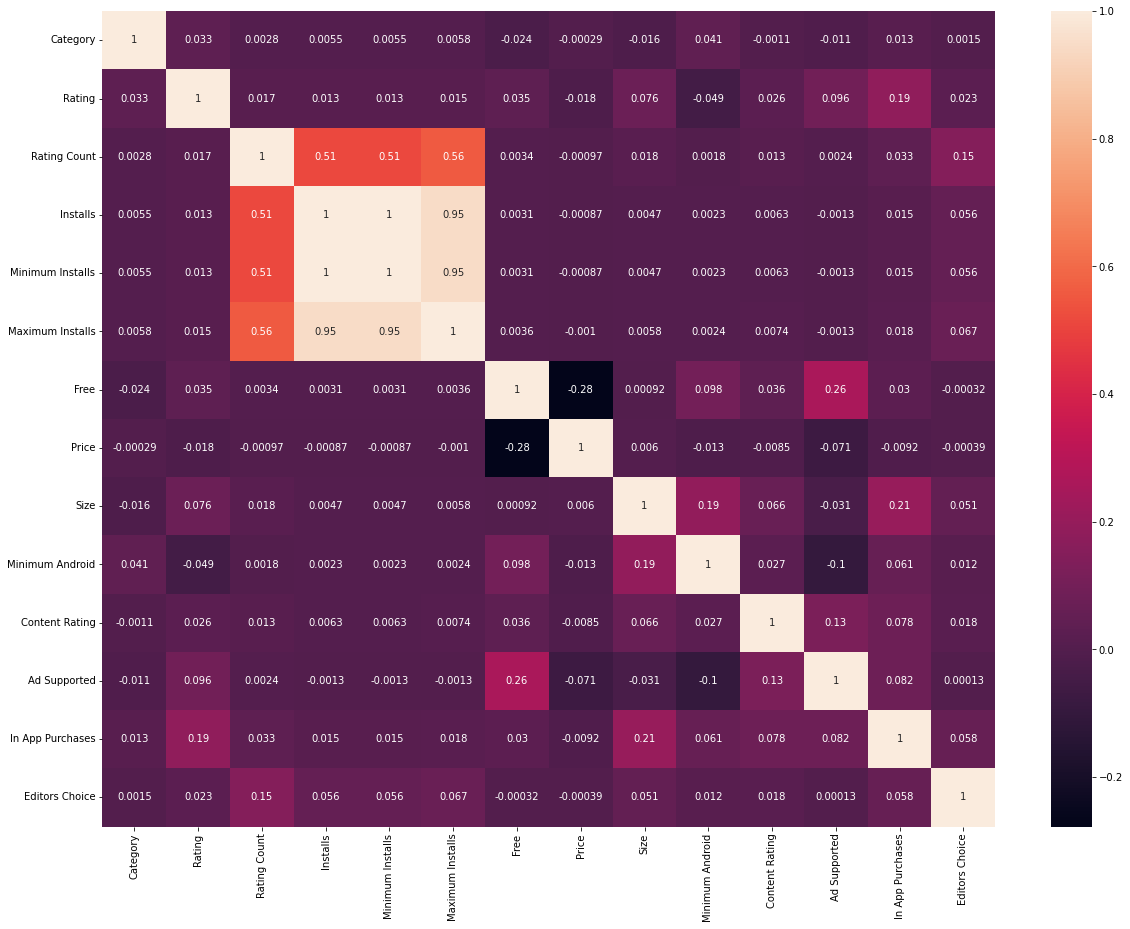

In [62]:
#Xem sự tương đồng giữa các thuộc tính
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(),annot=True)
plt.plot()

In [65]:
#Xuất kết quả tiền xử lý 
df.to_csv('D:/HK6/KhaiThacDL/BaoCao/CSV/Data-DaXuLy.csv')